In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1) 데이터 불러오기 및 통합
# -----------------------------

# 파일 경로와 sep=';' 인자를 올바르게 분리하여 수정했습니다.
red_wine = pd.read_csv("/content/drive/MyDrive/ml-programming-lab/week4/winequality-red.csv", sep=';')
white_wine = pd.read_csv("/content/drive/MyDrive/ml-programming-lab/week4/winequality-white.csv", sep=';')

# 와인 종류를 구분하기 위해 'type' 열을 추가합니다.
red_wine['type'] = 1  # red: 1
white_wine['type'] = 0 # white: 0

# 두 데이터셋을 하나로 합칩니다.
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)


In [6]:
# -----------------------------
# 2) 특징(X)과 타겟(y) 분리
# -----------------------------

# 'quality' 열을 예측 대상(y)으로 설정하고, 나머지를 특징(X)으로 사용합니다.
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [7]:
# -----------------------------
# 3) 훈련 데이터와 테스트 데이터 분리
# -----------------------------

# 원본 데이터를 먼저 나눕니다. 스케일링은 훈련 데이터 분리 후에 진행합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# -----------------------------
# 4) 데이터 스케일링
# -----------------------------

# 훈련 데이터로만 scaler를 학습(fit)시키고, 훈련/테스트 데이터 모두에 적용(transform)합니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# -----------------------------
# 5) 타겟 변수 원-핫 인코딩
# -----------------------------

# 다중 클래스 분류를 위해 y값을 원-핫 벡터로 변환합니다.
y_train_ohe = pd.get_dummies(y_train).values
y_test_ohe = pd.get_dummies(y_test).values

In [10]:
# -----------------------------
# 6) 딥러닝 모델 구성 (Dropout 레이어 제외)
# -----------------------------

model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(y_train_ohe.shape[1], activation="softmax")  # 출력층 노드 수는 클래스의 개수와 동일
])

# 모델 요약 정보 출력
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,143 (12.28 KB)

 Trainable params: 3,143 (12.28 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# -----------------------------
# 7) 모델 컴파일
# -----------------------------

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",  # 원-핫 인코딩된 다중 분류 문제에 사용
    metrics=["accuracy"]
)

In [12]:
# -----------------------------
# 8) 모델 학습
# -----------------------------

history = model.fit(
    X_train_scaled, y_train_ohe,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4180 - loss: 1.4300 - val_accuracy: 0.5481 - val_loss: 1.1226
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5513 - loss: 1.0779 - val_accuracy: 0.5413 - val_loss: 1.0938
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5649 - loss: 1.0454 - val_accuracy: 0.5471 - val_loss: 1.0823
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5699 - loss: 1.0278 - val_accuracy: 0.5519 - val_loss: 1.0744
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5705 - loss: 1.0155 - val_accuracy: 0.5529 - val_loss: 1.0692
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5746 - loss: 1.0056 - val_accuracy: 0.5567 - val_loss: 1.0652
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5795 - loss: 0.9971 - val_accuracy: 0.5596 - val_loss: 1.0613
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5847 - loss: 0.9896 - val_accuracy: 0.

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


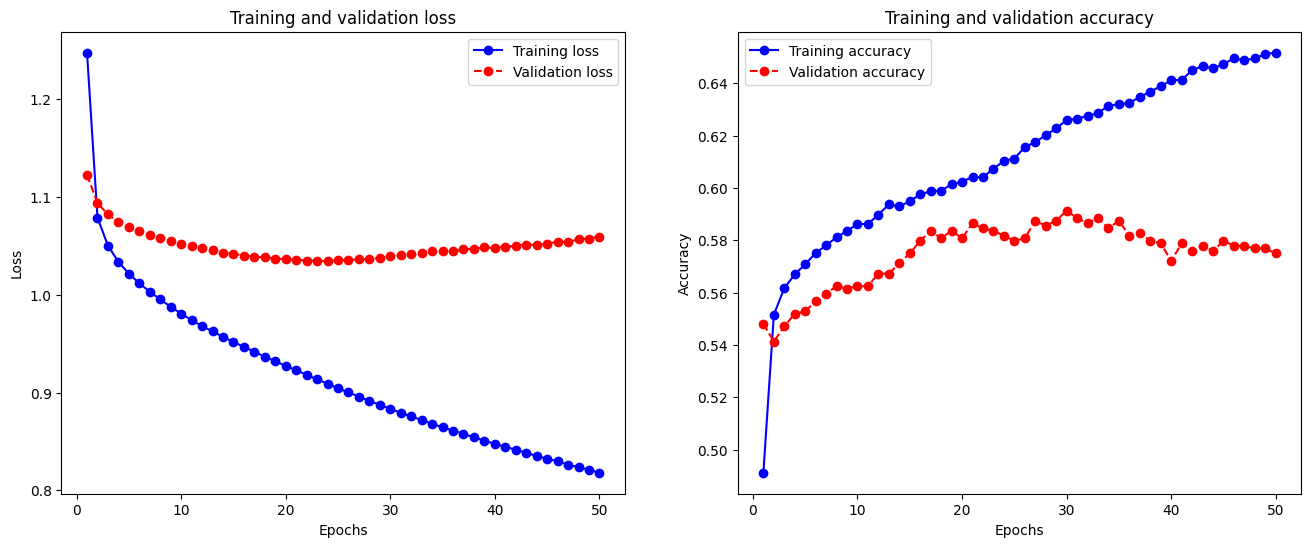

In [13]:
# -----------------------------
# 9) 모델 평가 및 결과 시각화
# -----------------------------

# 테스트 데이터로 예측 수행
y_pred_probs = model.predict(X_test_scaled)

# 원-핫 인코딩된 결과를 단일 클래스 레이블로 변환
y_test_class = np.argmax(y_test_ohe, axis=1)
y_pred_class = np.argmax(y_pred_probs, axis=1)

# 학습 곡선 시각화 (손실 및 정확도)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
epochs = range(1, len(history.history['loss']) + 1)

# 손실 곡선
ax1.plot(epochs, history.history['loss'], 'bo-', label='Training loss')
ax1.plot(epochs, history.history['val_loss'], 'ro--', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# 정확도 곡선
ax2.plot(epochs, history.history['accuracy'], 'bo-', label='Training accuracy')
ax2.plot(epochs, history.history['val_accuracy'], 'ro--', label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.36      0.12      0.18        43
           5       0.61      0.65      0.63       428
           6       0.58      0.68      0.62       567
           7       0.51      0.35      0.42       216
           8       0.38      0.15      0.22        39
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1300
   macro avg       0.35      0.28      0.29      1300
weighted avg       0.56      0.58      0.56      1300


Confusion Matrix:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


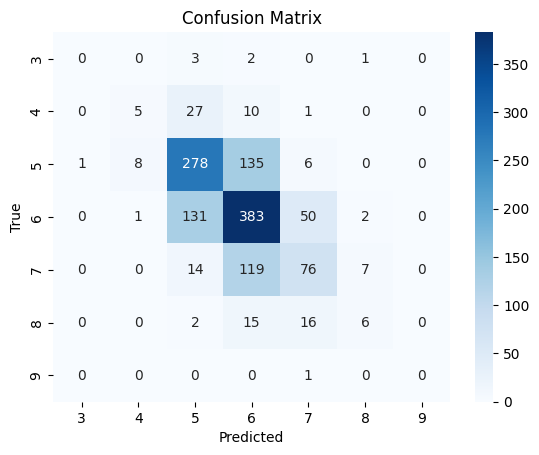

In [14]:
# -----------------------------
# 10) 최종 평가 결과 출력
# -----------------------------

print("\n" + "="*50)
print("Classification Report:")
# classification_report를 위해 실제 클래스 이름(quality 값)을 가져옵니다.
labels = sorted(y.unique())
print(classification_report(y_test, y_pred_class + labels[0])) # 예측 클래스 보정

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_class + labels[0]) # 예측 클래스 보정
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()